In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os

os.environ["DBT_CLOUD_SERVICE_TOKEN"] = "dbtc_Zx23Z4Yxd2jFYV6ixcRRlvXizT7cv_Qq5k2cgtdYF7Tn63Fj8A"

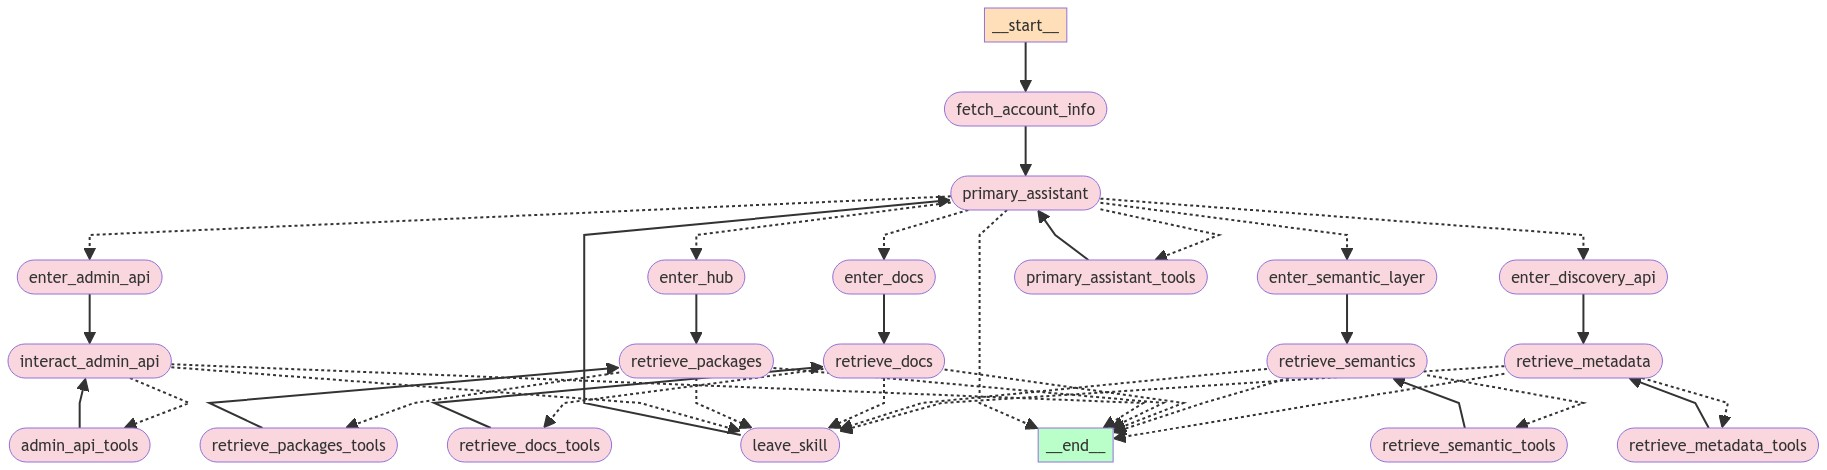

In [3]:
# stdlib
import uuid

# third party
from IPython.display import Image, display
from langchain_core.messages import HumanMessage

# first party
from dbt_assistant.graph import graph


try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [4]:
# Utility function
def _print_event(event: dict, _printed: set, max_length=3000):
    current_state = next(iter(event))
    if current_state:
        print("Currently in: ", current_state)
    message = event[current_state].get("messages")
    if message:
        if isinstance(message, list):
            message = message[-1]
        if message.id not in _printed:
            msg_repr = message.pretty_repr(html=True)
            if len(msg_repr) > max_length:
                msg_repr = msg_repr[:max_length] + " ... (truncated)"
            print(msg_repr)
            _printed.add(message.id)

In [ ]:
thread_id = str(uuid.uuid4())
config = {"configurable": {"thread_id": thread_id}}
_printed = set()
history = []
while True:
    user = input("User (q/Q to quit): ")
    if user in {"q", "Q"}:
        print("AI: Byebye")
        break
    history.append(HumanMessage(content=user))
    for event in graph.stream({"messages": history}, config):
        _print_event(event, _printed)

User (q/Q to quit):  What semantic models are defined in my project?


Currently in:  fetch_account_info


2024-07-19 07:04:46 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  primary_assistant
================================== Ai Message ==================================
Tool Calls:
  ToDiscoveryApiAssistant (call_wV3DghL4HvxrzgwMbsqRHEgy)
 Call ID: call_wV3DghL4HvxrzgwMbsqRHEgy
  Args:
    request: List all semantic models defined in the project.
Currently in:  enter_discovery_api
================================= Tool Message =================================

The assistant is now the Discovery API Assistant. Reflect on the above conversation between the host assistant and the user. Use the provided tools to assist the user. Remember, you are Discovery API Assistant, and the action is not complete until after you have successfully invoked the appropriate tool. If the user changes their mind or needs help for other tasks, call the CompleteOrEscalate function to let the primary host assistant take control. Do not mention who you are - just act as the proxy for the assistant.


2024-07-19 07:04:47 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_metadata
================================== Ai Message ==================================
Tool Calls:
  get_semantic_models (call_4HuZQa20pDwNvPhgSzUobyqU)
 Call ID: call_4HuZQa20pDwNvPhgSzUobyqU
  Args:


[07:04:48] No more results to fetch.                                                                ]8;id=906595;file:///Users/dpg/personal/dbt-assistant/.venv/lib/python3.11/site-packages/dbtc/client/metadata.py\metadata.py]8;;\:]8;id=745457;file:///Users/dpg/personal/dbt-assistant/.venv/lib/python3.11/site-packages/dbtc/client/metadata.py#542\542]8;;\

Currently in:  retrieve_metadata_tools


2024-07-19 07:04:49 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_metadata
================================== Ai Message ==================================

Here are the semantic models defined in your project:

1. **Customers**
   - **Description**: Customer dim table at the individual customer level. This table contains one row per customer and includes the customer key.
   - **Dimensions**:
     - customer_id: The ID of the customer
     - customer_name: The name of the customer
     - customer_market_segment: The market segment the customer belongs to
     - customer_balance_segment: Bucketing customers by their account balance
     - nation: The nation the customer belongs to
     - region: The region the customer belongs to
   - **Entities**:
     - customer (primary)

2. **Order Items**
   - **Description**: Line items for an order. An order_key can be represented multiple times in this table.
   - **Dimensions**:
     - order_date
   - **Entities**:
     - order_item (primary)
     - supplier (foreign)
     - customer 

User (q/Q to quit):  What dimensions are available via the suppliers semantic model?


Currently in:  fetch_account_info


2024-07-19 07:05:14 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  primary_assistant
================================== Ai Message ==================================

The dimensions available via the **suppliers** semantic model are:

1. **nation**: The nation the customer belongs to
2. **region**: The region the customer belongs to
3. **supplier_name**: The name of the supplier

If you need further details or have any other questions, feel free to ask!


User (q/Q to quit):  Can you show me the values for the region dimension?


Currently in:  fetch_account_info


2024-07-19 07:05:28 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  primary_assistant
================================== Ai Message ==================================
Tool Calls:
  ToSemanticLayerAssistant (call_SSWamYYvPvnFBwXkqG6pAq4B)
 Call ID: call_SSWamYYvPvnFBwXkqG6pAq4B
  Args:
    request: Show the values for the 'region' dimension in the 'suppliers' semantic model.
Currently in:  enter_semantic_layer


2024-07-19 07:05:29 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_semantics
================================== Ai Message ==================================
Tool Calls:
  get_dimension_values (call_lYtqF6fQ0awc3mvz2xG7aQUo)
 Call ID: call_lYtqF6fQ0awc3mvz2xG7aQUo
  Args:
    dimension: region
Currently in:  retrieve_semantic_tools


2024-07-19 07:05:31 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_semantics
================================== Ai Message ==================================

It appears that no values were found for the **region** dimension. This could be due to various reasons such as the data not being populated or the dimension not being correctly defined.

Would you like me to try again with different parameters or assist you with something else?


User (q/Q to quit):  The name region may be slightly different, can you find that first and then try again


Currently in:  fetch_account_info


2024-07-19 07:06:05 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  primary_assistant
================================== Ai Message ==================================
Tool Calls:
  ToDiscoveryApiAssistant (call_x7EXUDue2zzBOAskeiFEVYHF)
 Call ID: call_x7EXUDue2zzBOAskeiFEVYHF
  Args:
    request: List all dimensions in the 'suppliers' semantic model.
Currently in:  enter_discovery_api


2024-07-19 07:06:07 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_metadata
================================== Ai Message ==================================
Tool Calls:
  get_semantic_models (call_IOQtkiu4zaVjmYNSTXZqpOaD)
 Call ID: call_IOQtkiu4zaVjmYNSTXZqpOaD
  Args:


[07:06:07] No more results to fetch.                                                                ]8;id=610300;file:///Users/dpg/personal/dbt-assistant/.venv/lib/python3.11/site-packages/dbtc/client/metadata.py\metadata.py]8;;\:]8;id=779487;file:///Users/dpg/personal/dbt-assistant/.venv/lib/python3.11/site-packages/dbtc/client/metadata.py#542\542]8;;\

Currently in:  retrieve_metadata_tools


2024-07-19 07:06:09 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_metadata
================================== Ai Message ==================================

The dimensions in the **suppliers** semantic model are:

1. **nation**: The nation the customer belongs to
2. **region**: The region the customer belongs to
3. **supplier_name**: The name of the supplier

The dimension name is indeed **region**. Let's try to fetch the values for the **region** dimension again.
Tool Calls:
  get_resource_query_history (call_FtDCrohIzqL3CZohXgzay9H4)
 Call ID: call_FtDCrohIzqL3CZohXgzay9H4
  Args:
    unique_id: semantic_model.tpch.suppliers
Currently in:  retrieve_metadata_tools


2024-07-19 07:06:16 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_metadata
================================== Ai Message ==================================
Tool Calls:
  get_resource_query_history (call_IbpYfR7KWush6h3ZBGBXpRxI)
 Call ID: call_IbpYfR7KWush6h3ZBGBXpRxI
  Args:
    unique_id: semantic_model.tpch.suppliers
    start: 2024-01-01
    end: 2024-07-19


[07:06:16] No pageInfo found in query so making a single request.                                   ]8;id=35872;file:///Users/dpg/personal/dbt-assistant/.venv/lib/python3.11/site-packages/dbtc/client/metadata.py\metadata.py]8;;\:]8;id=510213;file:///Users/dpg/personal/dbt-assistant/.venv/lib/python3.11/site-packages/dbtc/client/metadata.py#511\511]8;;\

Currently in:  retrieve_metadata_tools


2024-07-19 07:06:17 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_metadata
================================== Ai Message ==================================

It seems that there are no query results for the **region** dimension in the **suppliers** semantic model. This could be due to the data not being populated or other issues.

Would you like to try something else or need assistance with another query?


User (q/Q to quit):  Can you try with customer__region?


Currently in:  fetch_account_info


2024-07-19 07:06:58 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  primary_assistant
================================== Ai Message ==================================
Tool Calls:
  ToSemanticLayerAssistant (call_dDnHIyEymPsr3qzYoMrv8Fjb)
 Call ID: call_dDnHIyEymPsr3qzYoMrv8Fjb
  Args:
    request: Show the values for the 'customer__region' dimension in the 'suppliers' semantic model.
Currently in:  enter_semantic_layer


2024-07-19 07:06:59 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_semantics
================================== Ai Message ==================================
Tool Calls:
  get_dimension_values (call_Wk1YiCm6p8NllXIjqEBipudL)
 Call ID: call_Wk1YiCm6p8NllXIjqEBipudL
  Args:
    dimension: customer__region
Currently in:  retrieve_semantic_tools


2024-07-19 07:07:03 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Currently in:  retrieve_semantics
================================== Ai Message ==================================

Here are the values for the **customer__region** dimension:

- ASIA
- EUROPE
- AFRICA
- AMERICA
- MIDDLE EAST

If you need further assistance or have any other questions, feel free to ask!
